In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('../../out/parquet/raw.parquet')
df['startTime'] = df['startTime'].astype(str)
print(df.shape)

df.head()

(6016, 11)


,playerId,startTime,bike,bus,car,train,walk,counterName,target,periodTarget,state
0,u_0bea6988-bd00-4aa6-a456-4285744356ee,2023-04-23,0,0,0,0,0,Walk_Km,1,0,COMPLETED
1,u_0bea6988-bd00-4aa6-a456-4285744356ee,2023-04-23,0,0,0,0,0,green_leaves,30,2,COMPLETED
2,u_1636dfdc-fbcc-4068-8fcd-3293369c3a82,2023-04-23,0,0,0,0,0,Walk_Km,1,0,COMPLETED
3,u_1636dfdc-fbcc-4068-8fcd-3293369c3a82,2023-04-23,0,0,0,0,0,green_leaves,30,2,COMPLETED
4,u_2fe7aac8-07da-4d38-8b0a-978be1986ebf,2023-04-23,0,0,0,0,0,Walk_Km,1,0,COMPLETED


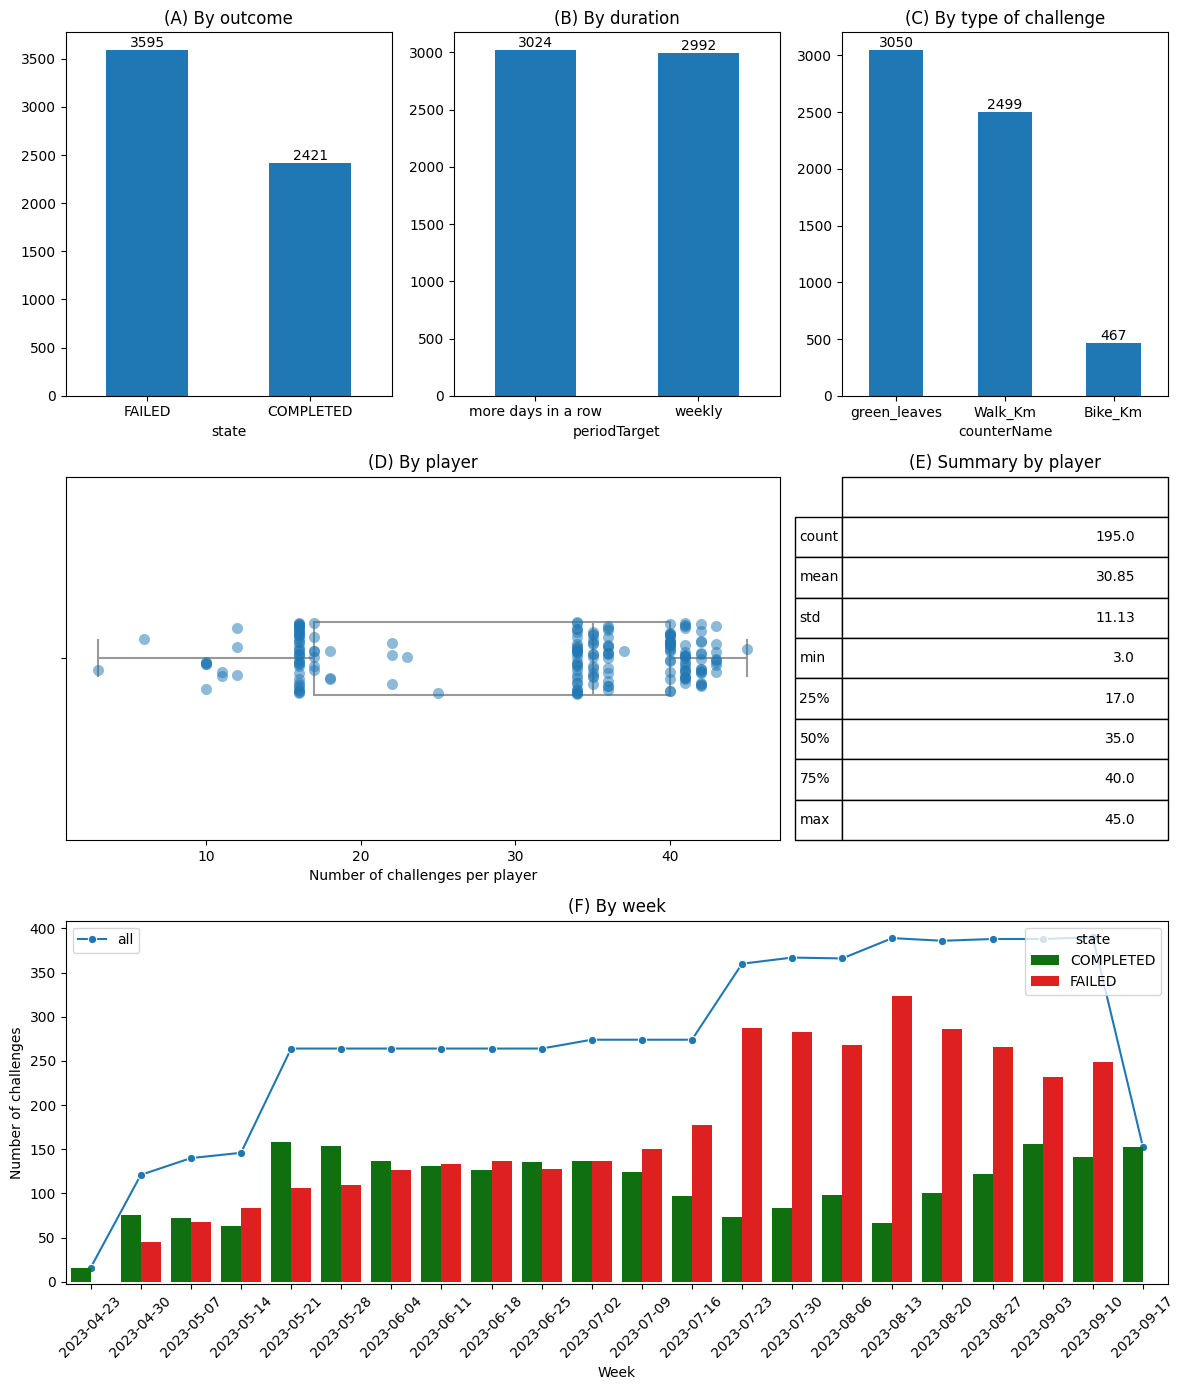

In [4]:
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np

gs = GridSpec(3, 3)
fig = plt.figure(figsize=(12, 14))

ax1 = fig.add_subplot(gs[0, 0])
df['state'].value_counts().plot(kind='bar', rot=0, ax=ax1)
ax1.set_title('(A) By outcome')
for xi, yi in enumerate(df['state'].value_counts()):
    ax1.text(xi, yi, str(yi), ha='center', va='bottom')

ax2 = fig.add_subplot(gs[0, 1])
df['repetitive'] = df['periodTarget'].apply(lambda x: x > 0)
df['repetitive'].value_counts().plot(kind='bar', rot=0, ax=ax2)
ax2.set_xticklabels(['more days in a row', 'weekly'])
ax2.set_xlabel('periodTarget')
ax2.set_title('(B) By duration')
for xi, yi in enumerate(df['repetitive'].value_counts()):
    ax2.text(xi, yi, str(yi), ha='center', va='bottom')


ax3 = fig.add_subplot(gs[0, 2])
df['counterName'].value_counts().plot(kind='bar', rot=0, ax=ax3)
ax3.set_title('(C) By type of challenge')
for xi, yi in enumerate(df['counterName'].value_counts()):
    ax3.text(xi, yi, str(yi), ha='center', va='bottom')

ax5 = fig.add_subplot(gs[1, 0:2])
ax5.set_title('(D) By player')
d = df.groupby(['playerId']).size()
sns.boxplot(data=d, color='white', width=0.2, linewidth=1.5, fliersize=0, ax=ax5, orient='h')
sns.stripplot(data=d, size=8, alpha=0.5, ax=ax5, orient='h')
ax5.set_xlabel('Number of challenges per player')

ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('(E) Summary by player')
ax6.axis('off')
dd = d.describe().round(2)
table = ax6.table(cellText=np.vstack(dd.values), rowLabels=dd.index, colLabels=[''], loc='center', bbox=[0, 0, 1, 1])
table.scale(1, 1.5)

ax4 = fig.add_subplot(gs[2, :])
sns.lineplot(data=df.groupby('startTime').size(), ax=ax4, label='all', marker='o')
ax4.tick_params(axis='x', rotation=45)

ax5 = ax4.twinx()
sns.countplot(data=df, ax=ax5, x='startTime', hue='state', palette=['green', 'red']).set_axis_off()
ax5.sharey(ax4)

ax4.set_title('(F) By week')
ax4.set_xlabel('Week')
ax4.set_ylabel('Number of challenges')
ax4.legend()

fig.tight_layout()
fig.savefig('../../out/img/eda1.pdf')

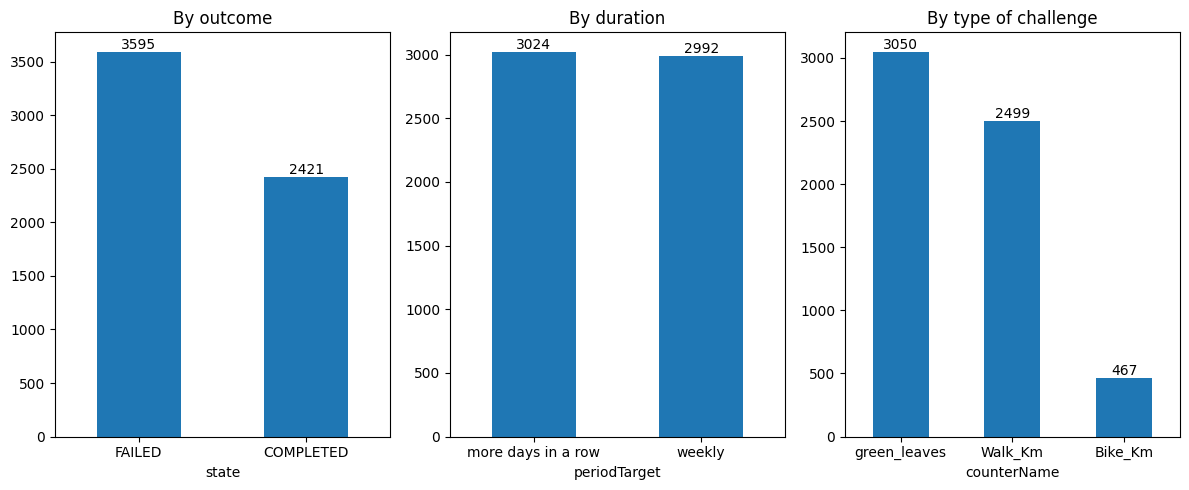

In [5]:
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

df['state'].value_counts().plot(kind='bar', rot=0, ax=axs[0])
axs[0].set_title('By outcome')
for xi, yi in enumerate(df['state'].value_counts()):
    axs[0].text(xi, yi, str(yi), ha='center', va='bottom')

df['repetitive'] = df['periodTarget'].apply(lambda x: x > 0)
df['repetitive'].value_counts().plot(kind='bar', rot=0, ax=axs[1])
axs[1].set_xticklabels(['more days in a row', 'weekly'])
axs[1].set_xlabel('periodTarget')
axs[1].set_title('By duration')
for xi, yi in enumerate(df['repetitive'].value_counts()):
    axs[1].text(xi, yi, str(yi), ha='center', va='bottom')

df['counterName'].value_counts().plot(kind='bar', rot=0, ax=axs[2])
axs[2].set_title('By type of challenge')
for xi, yi in enumerate(df['counterName'].value_counts()):
    axs[2].text(xi, yi, str(yi), ha='center', va='bottom')

fig.tight_layout()
fig.savefig('../../out/img/eda.pdf')

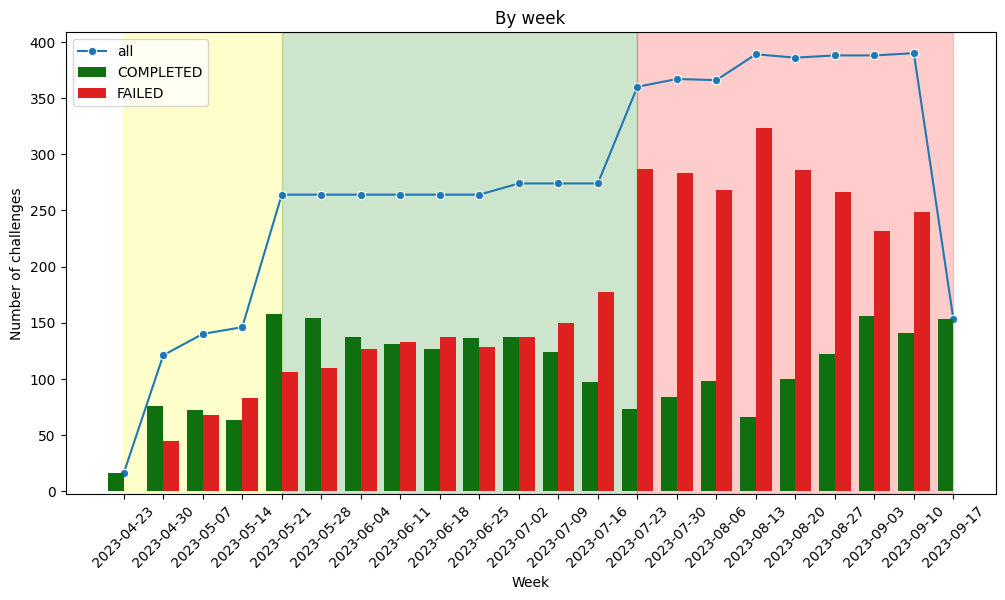

In [26]:
ax = plt.figure(figsize=(12, 6)).gca()
sns.lineplot(data=df.groupby('startTime').size(), label='all', marker='o', ax=ax)
ax.tick_params(axis='x', rotation=45)

ax1 = ax.twinx()
sns.countplot(data=df, ax=ax1, x='startTime', hue='state', palette=['green', 'red']).set_axis_off()
ax1.sharey(ax)

ax.set_title('By week')
ax.set_xlabel('Week')
ax.set_ylabel('Number of challenges')
ax.legend([*ax.get_legend().legend_handles, *ax1.get_legend().legend_handles], ['all', 'COMPLETED', 'FAILED'], loc='upper left')
ax1.get_legend().remove()

ax.axvspan('2023-04-23', '2023-05-21', color='yellow', alpha=0.2)
ax.axvspan('2023-05-21', '2023-07-23', color='green', alpha=0.2)
ax.axvspan('2023-07-23', '2023-09-17', color='red', alpha=0.2)

plt.savefig('../../out/img/by_week.pdf', bbox_inches='tight')

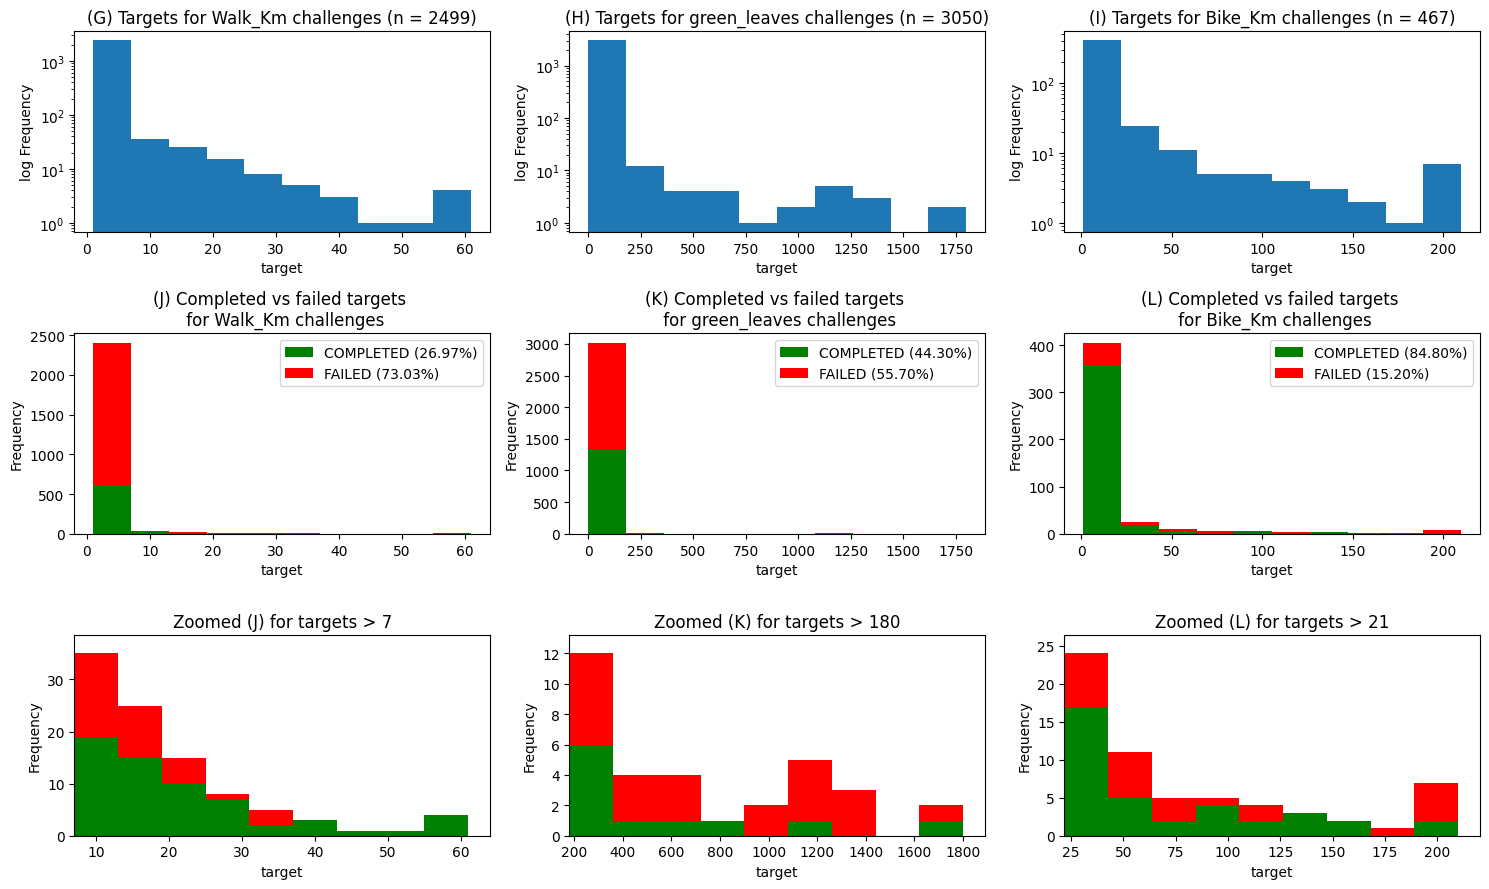

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(15, 9))

for mode, ax, id in zip(df['counterName'].unique(), axs.flatten()[0:3], 'GHI'):
    p = df[df['counterName'] == mode]['target']
    ax.set_title(f'({id}) Targets for {mode} challenges (n = {len(p)})')
    p.plot(kind='hist', ax=ax, logy=True, ylabel='log Frequency')
    ax.set_xlabel('target')

for mode, ax, id in zip(df['counterName'].unique(), axs.flatten()[3:6], 'JKL'):
    p = df[df['counterName'] == mode][['target', 'state']]
    C = p.loc[p['state'] == 'COMPLETED', 'target']
    F = p.loc[p['state'] == 'FAILED', 'target']
    ax.hist([C, F], label=['COMPLETED', 'FAILED'], color=['green', 'red'], stacked=True)
    ax.set_title(f'({id}) Completed vs failed targets \n for {mode} challenges')
    ax.set_ylabel('Frequency')
    ax.legend([f'COMPLETED ({len(C) / len(p) * 100:.2f}%)', f'FAILED ({len(F) / len(p) * 100:.2f}%)'])
    ax.set_xlabel('target')

for mode, ax, id in zip(df['counterName'].unique(), axs.flatten()[6:], 'JKL'):
    p = df[df['counterName'] == mode][['target', 'state']]
    C = p.loc[p['state'] == 'COMPLETED', 'target']
    F = p.loc[p['state'] == 'FAILED', 'target']
    x, bins, _ = ax.hist([C, F], label=['COMPLETED', 'FAILED'], color=['green', 'red'], stacked=True)

    ax.set_title(f'Zoomed ({id}) for targets > {int(bins[1])}')
    ax.set_ylabel('Frequency')
    ax.set_xlim(bins[1])
    ax.set_ylim(0, np.max(x.max(axis=0)[1:] * 1.1))
    ax.set_xlabel('target')
    
fig.tight_layout()
fig.savefig('../../out/img/eda2.pdf')

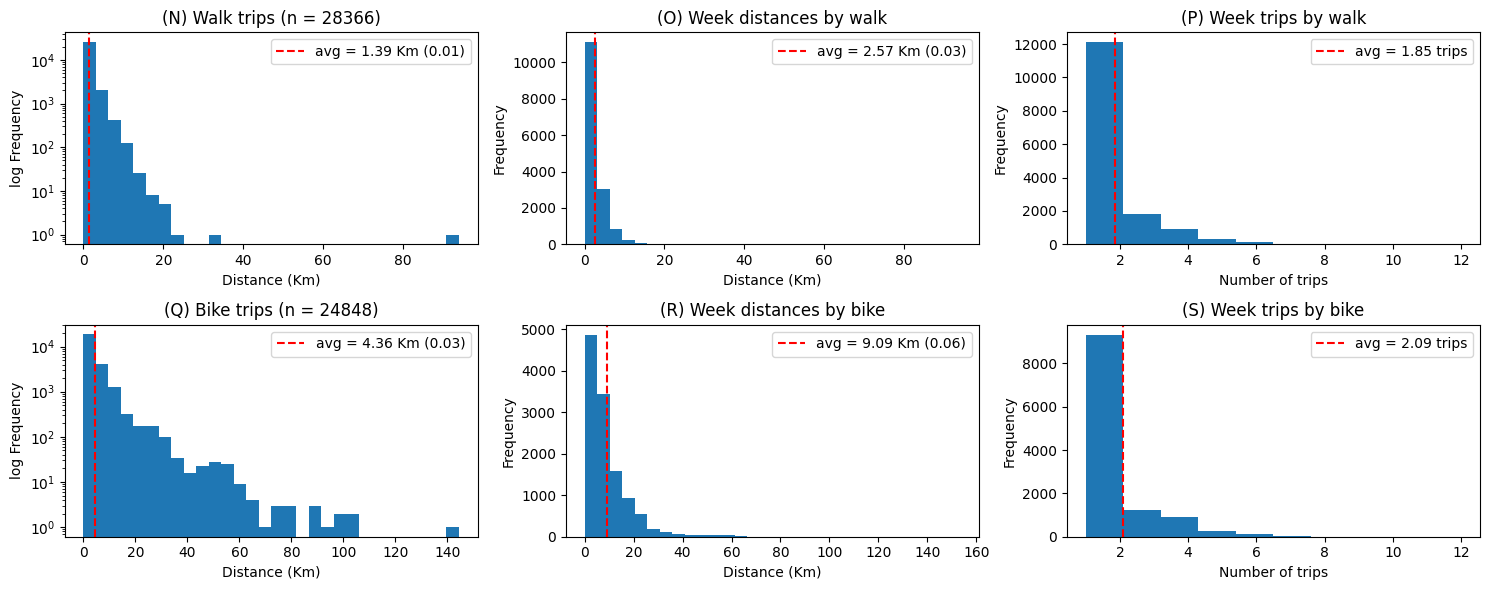

In [8]:
from sklearn.preprocessing import MinMaxScaler

trips_df = pd.read_parquet('../../out/parquet/trips.parquet')
trips_df = trips_df[['playerId', 'startTime', 'modeType', 'distance']]
trips_df['distance'] = trips_df['distance'] / 1000

trips_df_grouped = trips_df.groupby(['playerId', 'startTime', 'modeType']).agg(['sum', 'size']).reset_index()

fig, axs = plt.subplots(2, 3, figsize=(15, 6))
for mode, ax, id in zip(['walk', 'bike'], axs, ['NOP', 'QRS']):
    p = trips_df.loc[trips_df['modeType'] == mode, 'distance']

    scaler = MinMaxScaler()
    ps = pd.Series(scaler.fit_transform(p.values.reshape(-1, 1)).flatten())

    pg = trips_df_grouped.loc[trips_df_grouped['modeType'] == mode, 'distance']
    pgs = pd.Series(scaler.fit_transform(pg['sum'].values.reshape(-1, 1)).flatten())

    p.plot(kind='hist', bins=30, ax=ax[0], logy=True, ylabel='log Frequency')
    avg = ax[0].axvline(p.mean(), color='red', linestyle='--', label='avg')
    ax[0].legend([avg], [f'avg = {p.mean().round(2)} Km ({ps.mean().round(2)})'])
    ax[0].set_title(f'({id[0]}) {mode.capitalize()} trips (n = {len(p)})')
    ax[0].set_xlabel('Distance (Km)')

    pg['sum'].plot(kind='hist', bins=30, ax=ax[1])
    ax[1].axvline(pg['sum'].mean(), color='red', linestyle='--', label='avg')
    ax[1].legend([avg], [f'avg = {pg["sum"].mean().round(2)} Km ({pgs.mean().round(2)})'])
    ax[1].set_title(f'({id[1]}) Week distances by {mode}')
    ax[1].set_xlabel('Distance (Km)')

    pg['size'].plot(kind='hist', ax=ax[2])
    ax[2].axvline(pg['size'].mean(), color='red', linestyle='--', label='avg')
    ax[2].legend([avg], [f'avg = {pg["size"].mean().round(2)} trips'])
    ax[2].set_title(f'({id[2]}) Week trips by {mode}')
    ax[2].set_xlabel('Number of trips')


plt.tight_layout()
fig.savefig('../../out/img/eda3.pdf')

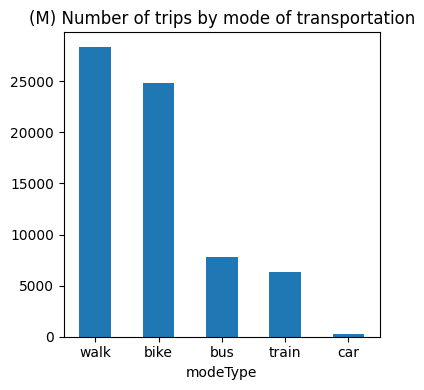

In [9]:
plt.figure(figsize=(4, 4))
trips_df['modeType'].value_counts().plot(kind='bar', rot=0)
plt.title('(M) Number of trips by mode of transportation')
plt.tight_layout()
plt.savefig('../../out/img/eda4.pdf', bbox_inches='tight')